In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

In [3]:
insurance = pd.read_csv('Insurance_train (1).csv')

In [4]:
insurance.shape

(58592, 44)

In [3]:
insurance.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


### Univariate analysis 

In [4]:
# We will analyse all the numerical columns
insurance.select_dtypes(include = np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [5]:
num = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement',
       'turning_radius', 'length', 'width', 'height',
       'gross_weight']
len(num)
# We have 10 numerical columns

10

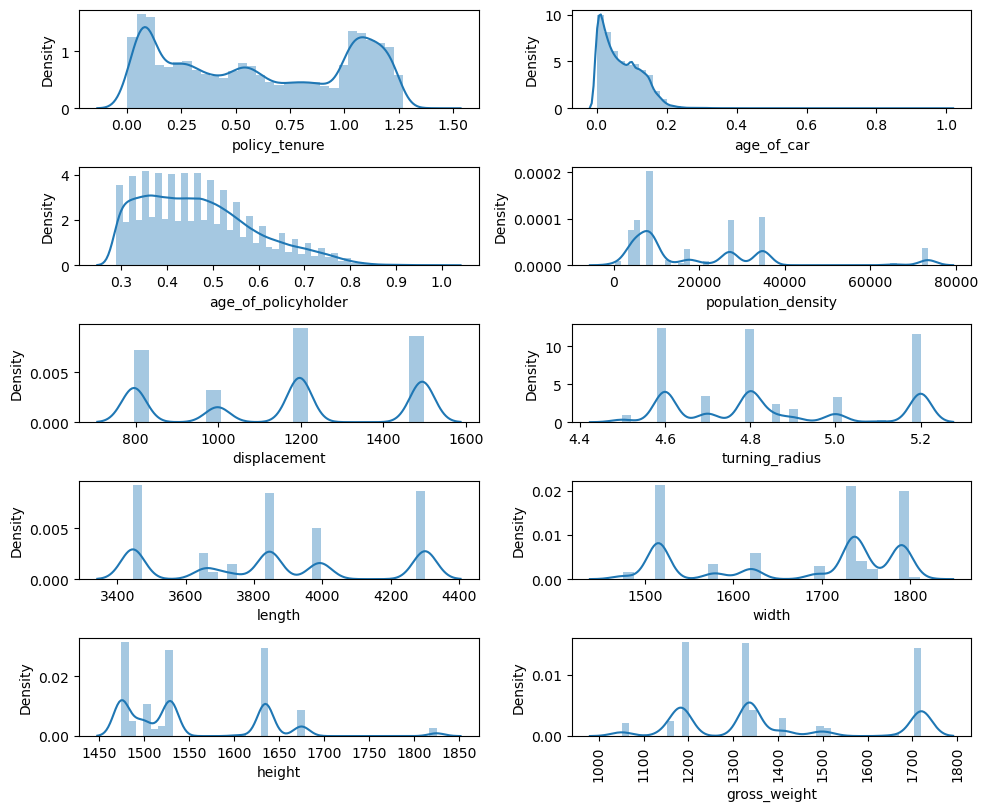

In [6]:
t = 1
plt.figure(figsize = (10,8))
for i in num:
    plt.subplot(5,2,t)
    sns.distplot(insurance[i])
    t += 1
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

Inferences
- Your policy tenure is uniform in nature there is no pattern

#### categorical columns

In [7]:
insurance.select_dtypes(include = 'object').columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [8]:
cats = ['area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert','make','airbags','cylinder','ncap_rating','is_claim']

len(cats)



30

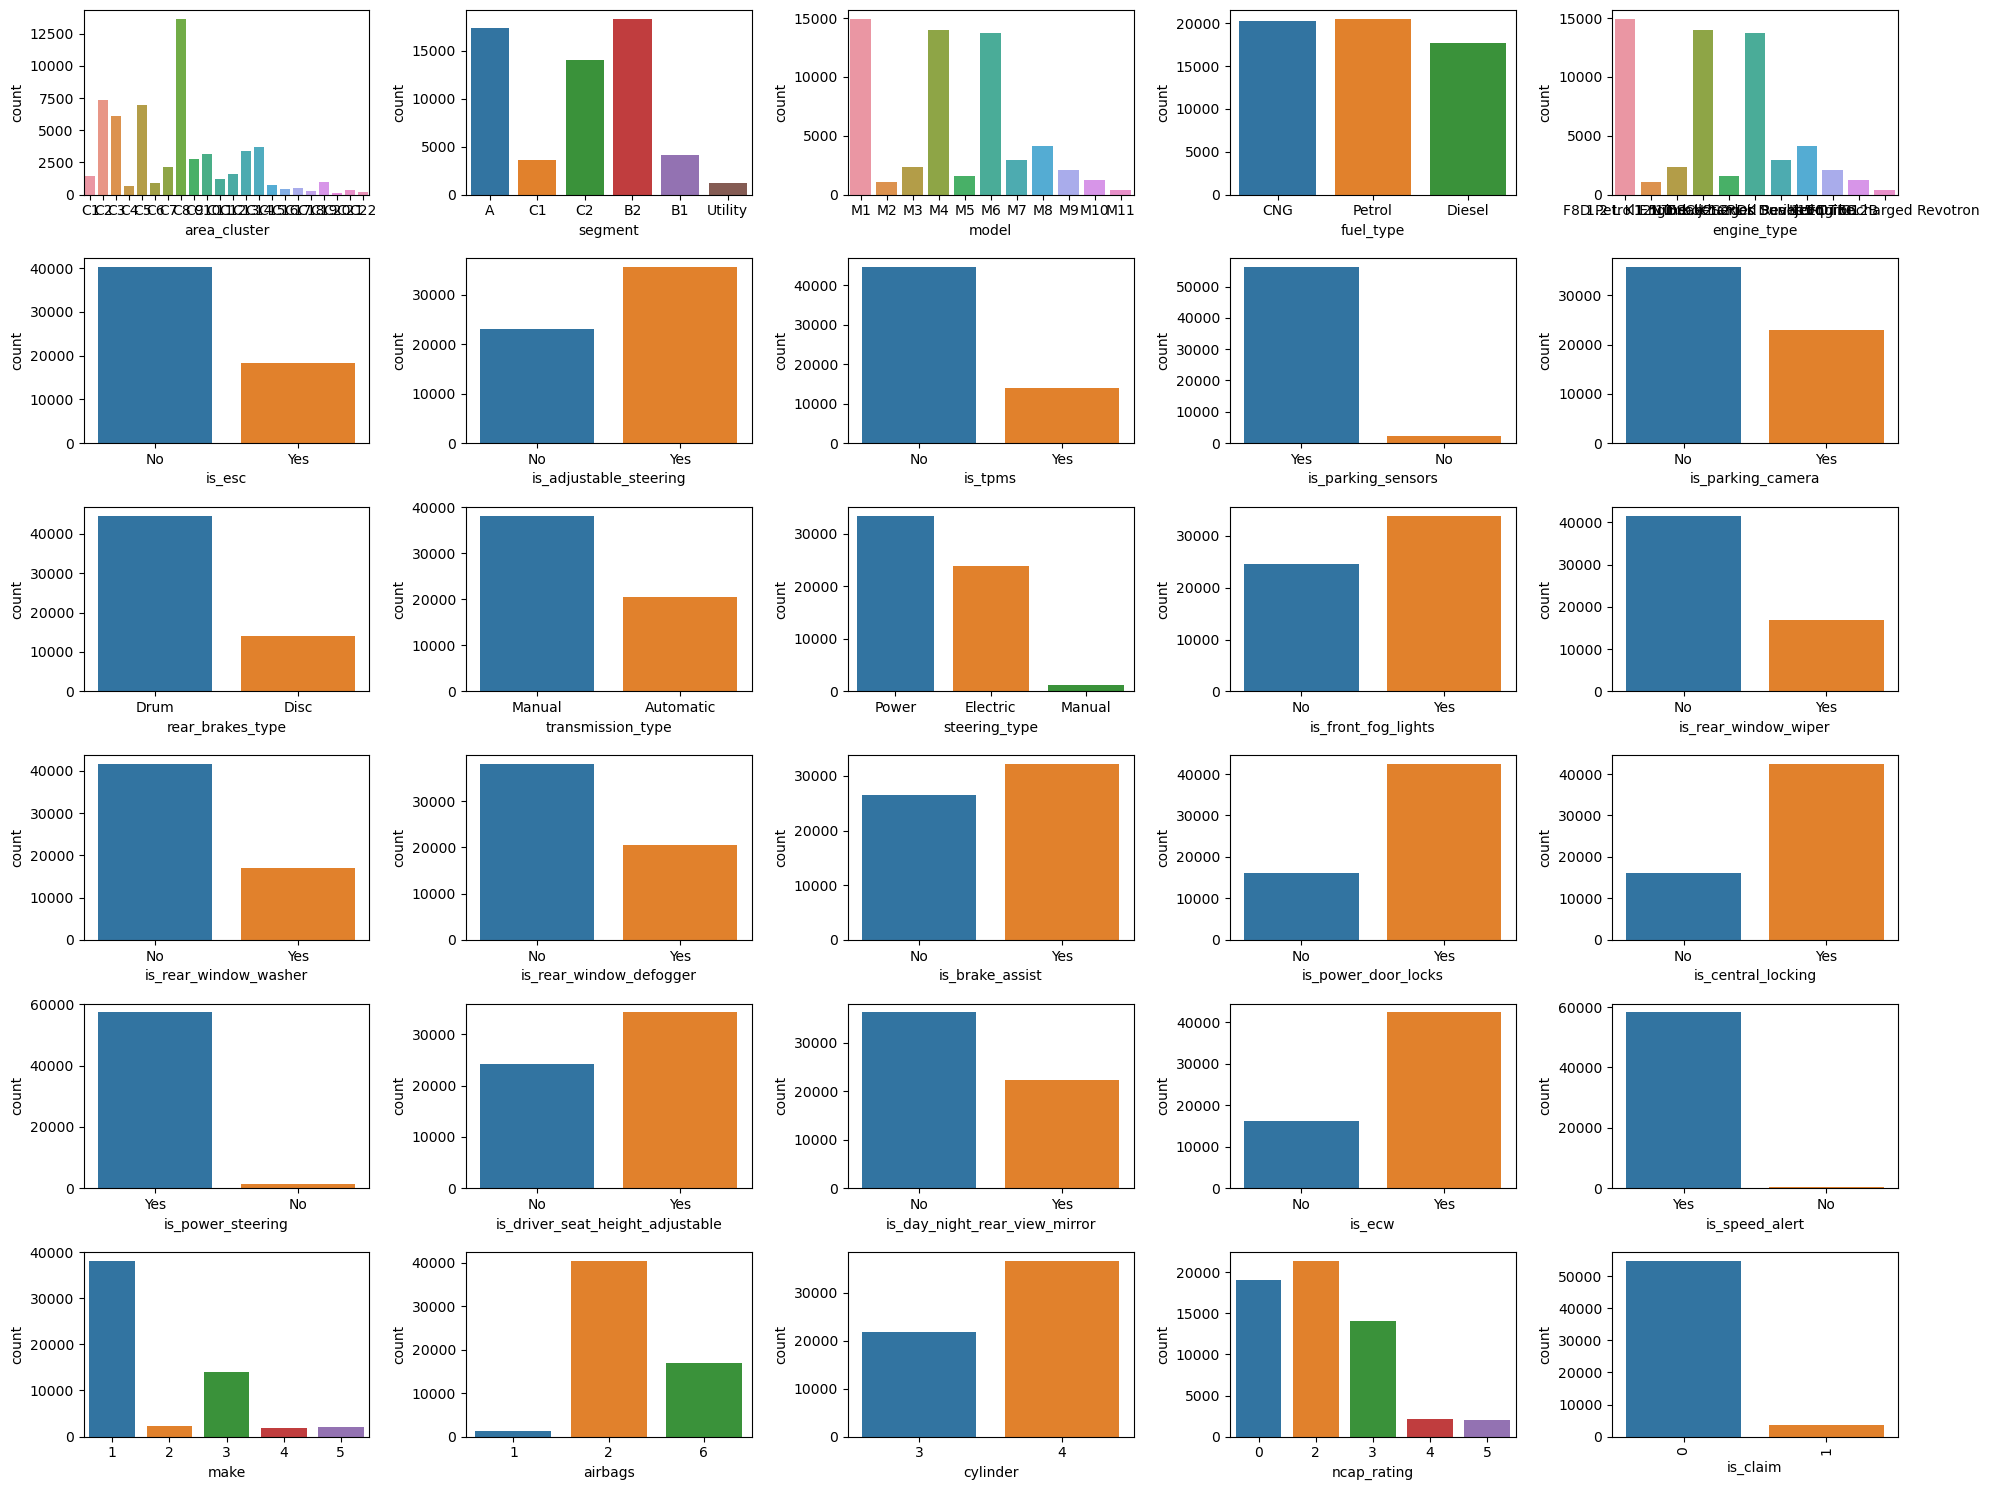

In [9]:
plt.figure(figsize = (20,15))
t = 1
for i in cats:
    plt.subplot(6,5,t)
    sns.countplot(data = insurance, x = i)
    t += 1
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [10]:
insurance.is_claim.value_counts(normalize=True)
# This type of problem is called imbalaced class
# over 94 

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

**Plotthing some categorical columns again for clarity**

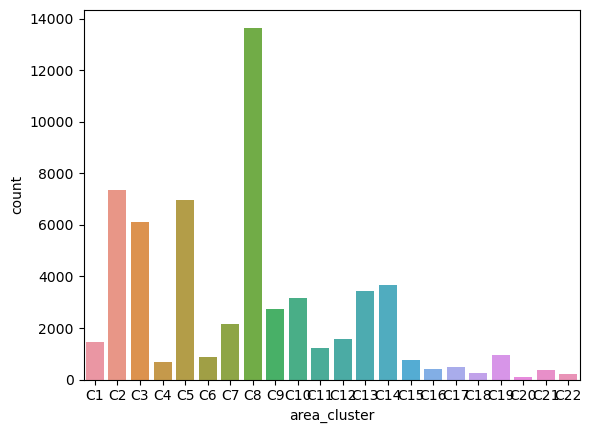

In [11]:
sns.countplot(x = 'area_cluster',data = insurance)
plt.show()
# Top 3 cluster are c8, c5 and c3 most likely

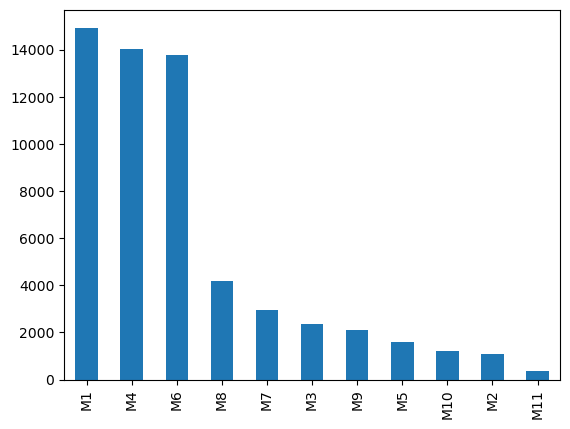

In [12]:
insurance['model'].value_counts().plot(kind = 'bar')
plt.show()
# Top 3 model cars are M1, M4, M6

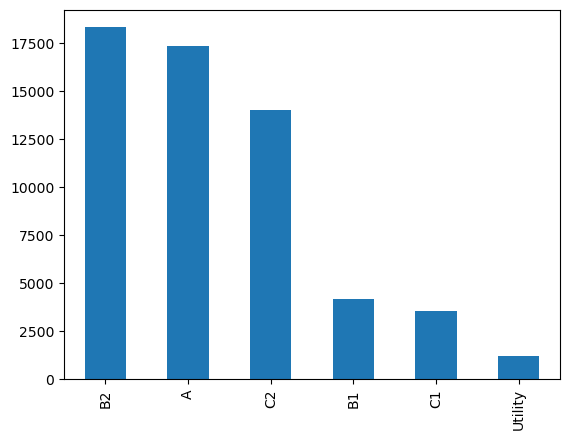

In [13]:
insurance.segment.value_counts().plot(kind ='bar')
plt.show()
# top 3 segments are B2, A, C2

<Axes: >

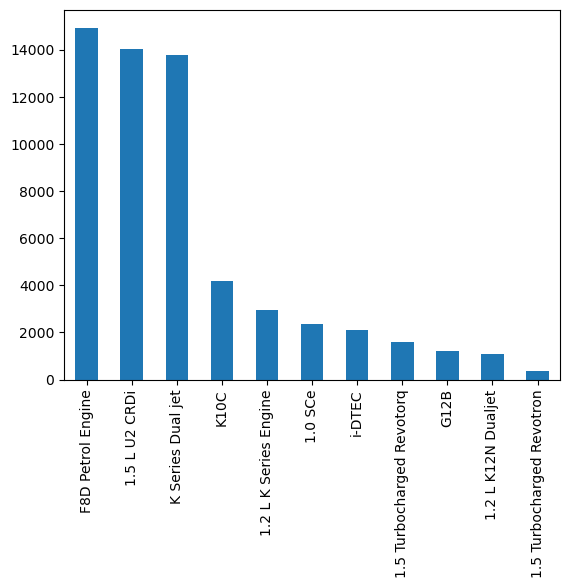

In [14]:
insurance.engine_type.value_counts().plot(kind='bar')

<Axes: xlabel='ncap_rating'>

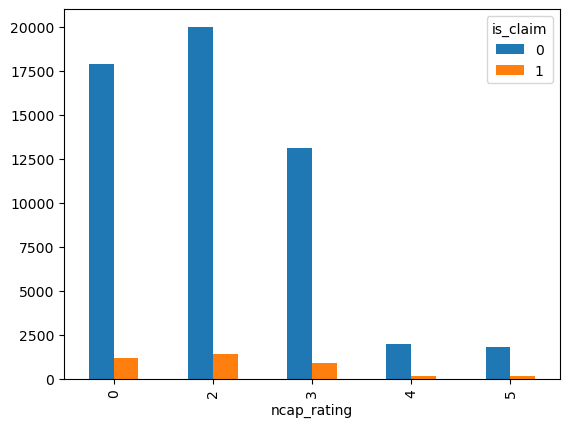

In [15]:
pd.crosstab(insurance.ncap_rating,insurance.is_claim).plot(kind='bar')
# lower the ncap more chances of a claim coming to insurance

In [16]:
insurance.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [17]:
# checking missing values
insurance.isnull().sum()
# no missing values

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

### Feature engg

In [18]:
torque = []
for i in insurance.max_torque:
    torque.append(i.split('Nm')[0])
    


In [19]:
insurance['Nm'] = pd.to_numeric(pd.Series(torque))

In [20]:
insurance.max_torque[0].split('@')[1].split('rpm')[0]

'3500'

In [21]:
rpm = []
for i in insurance.max_torque:
    rpm.append(i.split('@')[1].split('rpm')[0])
    
insurance['rpm'] = pd.to_numeric(pd.Series(rpm))

In [22]:
insurance.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,rpm
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500


In [23]:
insurance.max_power[0].split('bhp')[0]

'40.36'

In [24]:
bhp = []
for i in insurance['max_power']:
    bhp.append(i.split('bhp')[0])
    
insurance['bhp'] = pd.to_numeric(pd.Series(bhp))

In [25]:
insurance.max_power[0].split('@')[1].split('rpm')[0]

'6000'

In [26]:
rpm_power = []
for i in insurance['max_power']:
    rpm_power.append(i.split('@')[1].split('rpm')[0])
    
insurance['rpm_power'] = pd.to_numeric(pd.Series(rpm_power))

In [27]:
iscols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera','is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

In [28]:
labels = {'Yes':1,'No':0}

for i in iscols:
    insurance.loc[:,i] = insurance.loc[:,i].map(labels)

In [29]:
# Dropping some of the variables
insurance.drop(columns = ['policy_id','max_torque','max_power'], inplace=True)

In [30]:
insurance.engine_type.unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [31]:
def power(x):
    if x <= 1000:
        return('Underpower')
    elif x <=1200:
        return('Power')
    else:
        return('High_power')

insurance['disp_bin'] = insurance.displacement.apply(power)

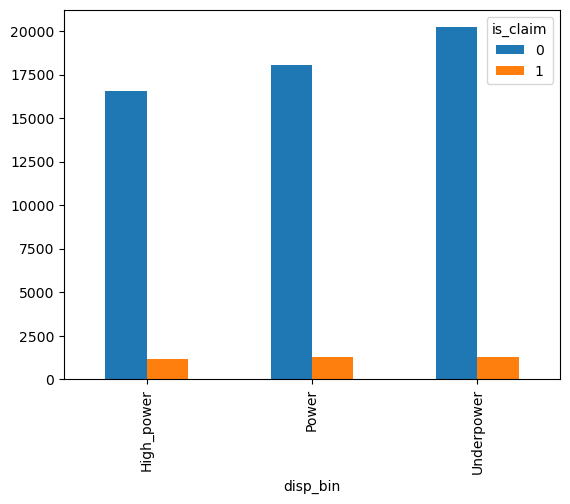

In [32]:
# Plotting the frequency of claim repective of its displacement
pd.crosstab(insurance.disp_bin, insurance.is_claim).plot(kind = 'bar')
plt.show()

In [33]:
# Dropping engine type
insurance.drop(columns=['engine_type'],inplace=True)

In [34]:
# Binning area_cluster
area = ['C1', 'C3', 'C4', 'C6', 'C7', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22']

def areas(x):
    if x in area:
        return('other')
    else:
        return(x)
    
insurance['area_cluster'] = insurance.area_cluster.apply(areas)

In [35]:
insurance.area_cluster.value_counts()

other    30617
C8       13654
C2        7342
C5        6979
Name: area_cluster, dtype: int64

In [36]:
insurance.model.unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [37]:
# Binning model columns
model = ['M2', 'M3', 'M5', 'M7', 'M8', 'M9', 'M10', 'M11']
def models(x):
    if x in model:
        return('others')
    else:
        return(x)
    
insurance['model'] = insurance.model.apply(models)

In [38]:
insurance.model.value_counts()

others    15850
M1        14948
M4        14018
M6        13776
Name: model, dtype: int64

In [39]:
insurance.segment.unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [40]:
insurance.segment.value_counts()

B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64

In [41]:
# Bining the columns segment
segement = ['C1', 'B1', 'Utility']

def segments(x):
    if x in segement:
        return('others')
    else:
        return(x)

insurance['segment'] = insurance.segment.apply(segments)

In [42]:
insurance.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,rpm,bhp,rpm_power,disp_bin
0,0.515874,0.05,0.644231,other,4990,1,A,M1,CNG,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,Underpower
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,Underpower


In [43]:
# encoding
dummy = pd.get_dummies(insurance, drop_first=True)

In [44]:
# Seperating x and y columns
X = dummy.drop(columns = ['is_claim'],axis = 1)
y = dummy.is_claim

In [45]:
# Train and test split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=0)

In [46]:
# Making a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression()

gnb = GaussianNB()

# fit on train and test
pred_train_lg = logreg.fit(xtrain,ytrain).predict(xtrain)
pred_test_lg = logreg.fit(xtrain,ytrain).predict(xtest)

# fit on train and test
pred_train_gnb = logreg.fit(xtrain,ytrain).predict(xtrain)
pred_test_gnb = logreg.fit(xtrain,ytrain).predict(xtest)

In [47]:
# checking the accuracy of this model
from sklearn.metrics import accuracy_score, classification_report

print('logreg train accuracy:', accuracy_score(ytrain, pred_train_lg))
print('logreg test accuracy:', accuracy_score(ytest, pred_test_lg))

print('GNB train accuracy:', accuracy_score(ytrain, pred_train_gnb))
print('GNB test accuracy:', accuracy_score(ytest, pred_test_gnb))

logreg train accuracy: 0.9351225652294498
logreg test accuracy: 0.939670620360099
GNB train accuracy: 0.9351225652294498
GNB test accuracy: 0.939670620360099


### precision and recall
* precision is the ratio of correctly predicted **positive calss** postive class to the totalpositives. It is defined as (TP/TP+FP)

* recall aka senstivity and true postive rate,. it is the ratio  of correctly predicted **positive observations to all the observations**. (TP/TP+FN)

Note Precision and recall are inversely associated with each other. It means that if the precision increases, the recall will go down and vice versa

* high recall indicated that you have a very low false negative

#### I need abalance of precision and recall the harmonic mean of precision and recall

* The harmonic mean of precision and recall is called F1 score
* while seeking balance between precision and recall we can use a metric known as **F1 score**

In [48]:
# classification report - precision, recall and F1 score
# model is giving more importance to 0 class

print(classification_report(ytest, pred_test_lg))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11012
           1       0.00      0.00      0.00       707

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



<Axes: >

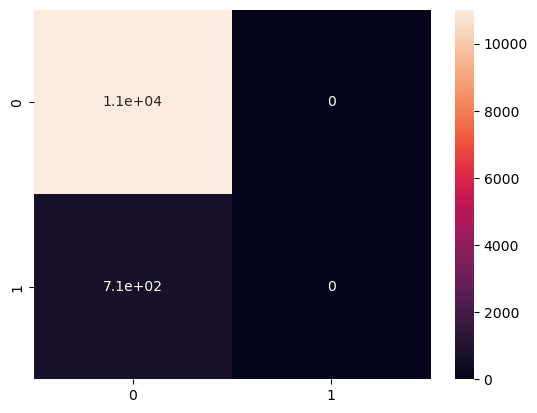

In [49]:
from sklearn.metrics import confusion_matrix, f1_score

sns.heatmap(confusion_matrix(ytest,pred_test_lg), annot=True)

In [50]:
print('FIScore: ', f1_score(ytest,pred_test_lg))

# predicting for class 1

FIScore:  0.0


### SMOTE- Handling imbalaced dataset

* Synthetic Minority Oversampling Technique - This is an oversampling strategy. It means we will try to synthetically generate more data for the minority clas

* this way the imbalace will be reduced upto ceratin extent and thus the model will be able to capture the precision and recall of minority class

* Suck modelks are genralised model as they are able to control the overfitiing where in on;y majority class gets more weightage and model predicts that class

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=0)

In [52]:
# Recreate the new samples
X_resmapled, y_resampled = smote.fit_resample(X,y)

In [53]:
print('y',y.value_counts())
print('y_smote',y_resampled.value_counts())

y 0    54844
1     3748
Name: is_claim, dtype: int64
y_smote 0    54844
1    54844
Name: is_claim, dtype: int64


In [54]:
xtrain,xtest,ytrain,ytest = train_test_split(X_resmapled, y_resampled, test_size=0.20, random_state=42)

In [55]:
lg = LogisticRegression()

pred = lg.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.53      0.40      0.45     11092
           1       0.51      0.64      0.56     10846

    accuracy                           0.51     21938
   macro avg       0.52      0.52      0.51     21938
weighted avg       0.52      0.51      0.51     21938



In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()


pred = gbm.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11092
           1       0.94      0.86      0.90     10846

    accuracy                           0.90     21938
   macro avg       0.91      0.90      0.90     21938
weighted avg       0.91      0.90      0.90     21938



In [63]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth= 3,random_state=123)

pred = dtree.fit(xtrain,ytrain).predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60     11092
           1       0.61      0.73      0.66     10846

    accuracy                           0.64     21938
   macro avg       0.64      0.64      0.63     21938
weighted avg       0.64      0.64      0.63     21938



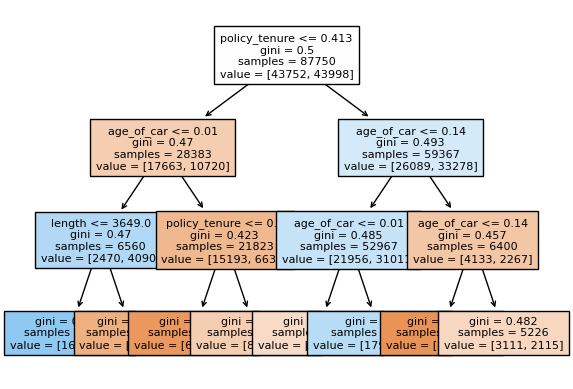

In [64]:
from sklearn.tree import plot_tree

output = plot_tree(dtree, feature_names=xtrain.columns, filled=True, fontsize=8)

### pruning

In [65]:
# list of parameters
params = [{'max_depth':[3,5,7,9,11,14,15,20],
          'max_feautures':[None,'sqrt','auto'],
          'min_samples_split':[5000,10000,12000,15000]}]

In [66]:
from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeClassifier(random_state=123)

search = RandomizedSearchCV(estimator=tree,param_distributions=params,cv = 5, random_state=123,
                            scoring='recall')

In [68]:
# Fit the model
model = search.fit(X_resmapled, y_resampled)